# **` Multiple_Linear_Regression_Bike_Sharing_Assignment`**

* Submitted By - **`Saurabh Gupta`**

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.|

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

* Let us first import NumPy and Pandas and read the housing dataset

In [2]:
# Importing the Day dataset
BikeSharing = pd.read_csv('day.csv')

In [3]:
# Looking at the first five rows
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
BikeSharing.shape

(730, 16)

**` * There are 730 rows and 16 columns in the data set.`**

In [5]:
BikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* **`  There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.`**


In [7]:
#Print number of unique values in all columns
BikeSharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Step-2 Data Preparation For EDA

### 2.1- Drop columns that are not useful for analysis

* **`instant`** is just a row instance identifier.
* **`dteday`** is removed as we have some of date features like **`mnth`** and **`year`** and **`weekday`** already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
* **`casual`** and **`registered`** variables are not available at the time of prediction and also these describe the target variable **`cnt`** in a very trivial way **`target = casual + registered`**, which leads to data leakage.

In [8]:
# Droping instant column as it is index column which has nothing to do with target
BikeSharing.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
BikeSharing.drop(['dteday'], axis= 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
BikeSharing.drop(['casual'], axis = 1, inplace = True)
BikeSharing.drop(['registered'], axis = 1, inplace = True)

In [9]:
# Checking dataset after dropping 4 columns
BikeSharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


### 2.2- Categorical Variables

In [10]:
# Checking for the value counts of season column - {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
BikeSharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
# Checking for the value counts of weathersit column - {1:'good',2:'moderate',3:'bad',4:'severe'}
BikeSharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
# Checking for the value counts of holiday column
BikeSharing.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [13]:
# Checking for the value counts of yr column
BikeSharing.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [14]:
# Checking for the value counts of workingday column
BikeSharing.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [15]:
BikeSharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


* we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

### 2.3- Dummy Variables

#### **`Convert season, weathersit, mnth and weekday to categorical types`**

In [16]:
BikeSharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

BikeSharing.weathersit.replace({1:'good',2:'moderate',3:'bad'},inplace = True)

BikeSharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                          7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)

BikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)
BikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


### 2.4- Boxplot for categorical variables to see demands

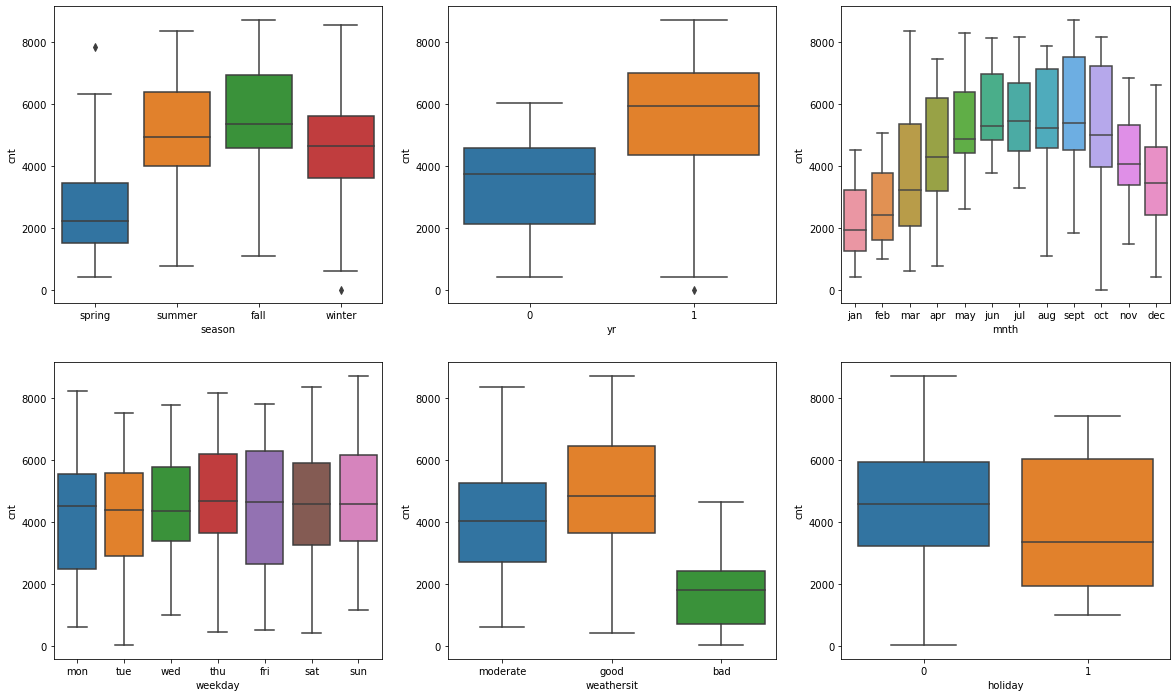

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeSharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BikeSharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeSharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeSharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeSharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeSharing)
plt.show()

Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

### 2.5- Visualising Numerical Variables

Lets make a pair plot for all the numerical variables.

<Figure size 1080x2160 with 0 Axes>

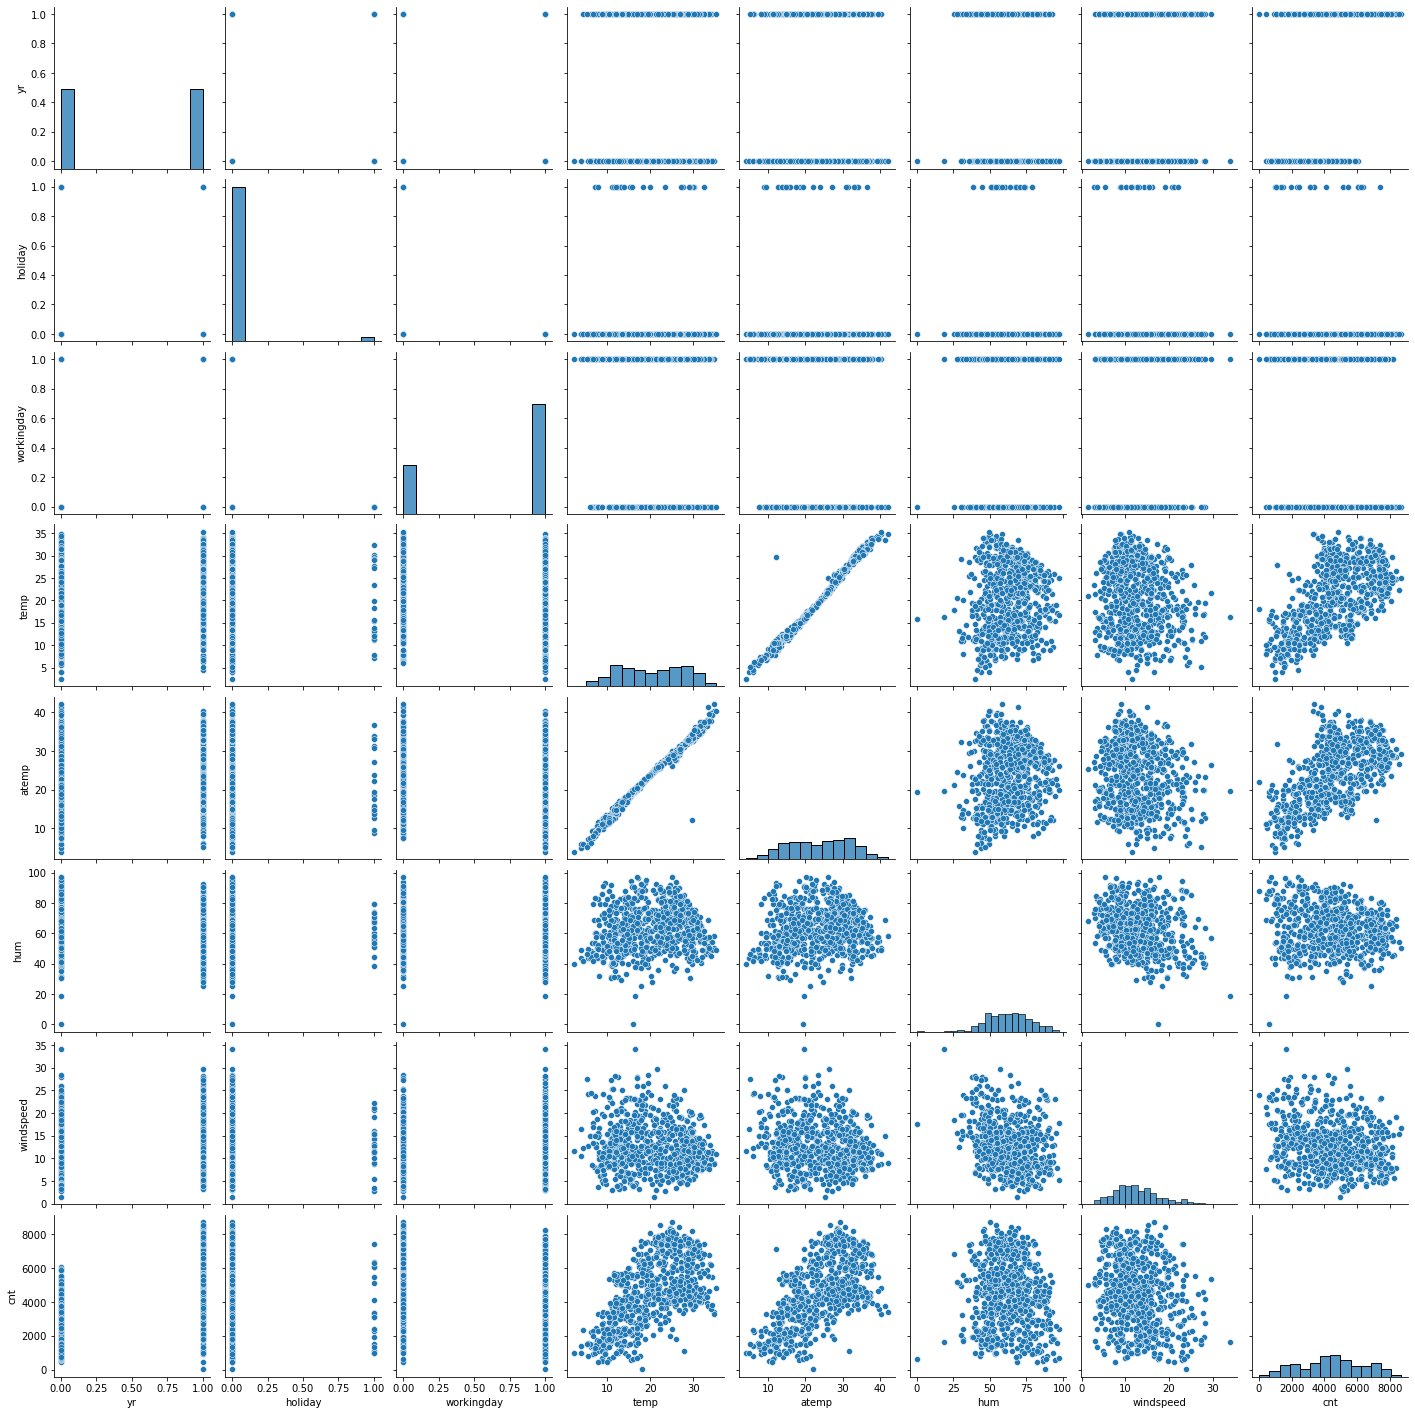

In [18]:
#Visualising pairplots for all numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(BikeSharing)
plt.show()

<Figure size 1080x2160 with 0 Axes>

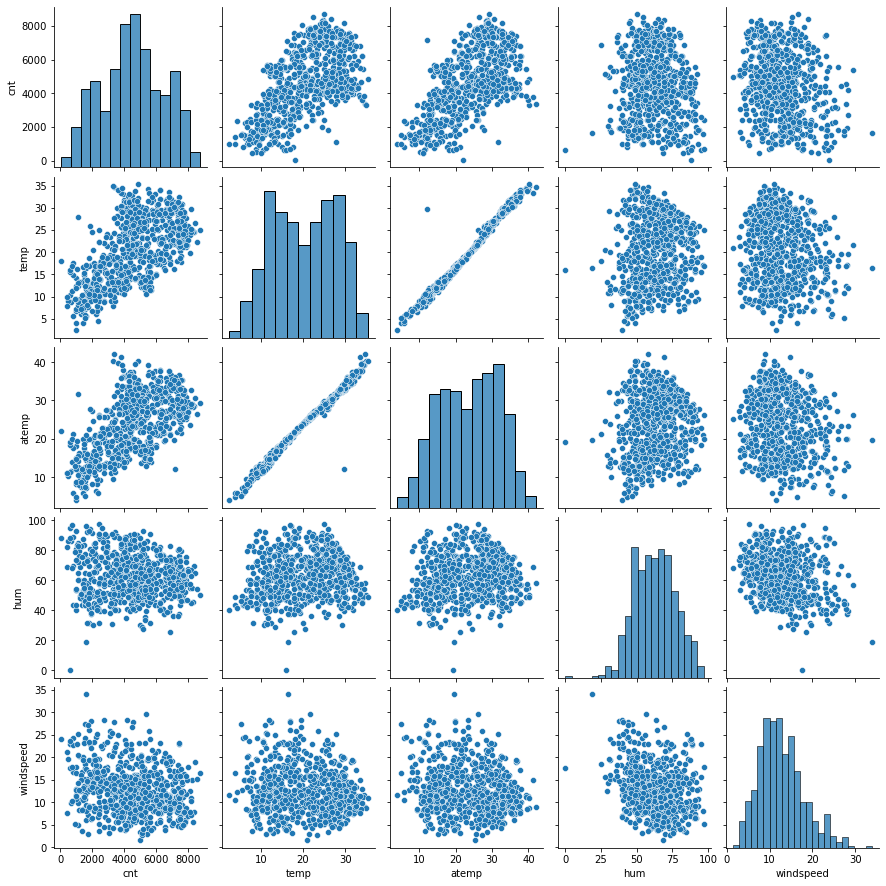

In [19]:
#Visualising pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(BikeSharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

* **`temp and atemp are highly co-related with each other`**

#### As we can see from the correlation map, output variable has a linear relationship with variables like temp, atemp

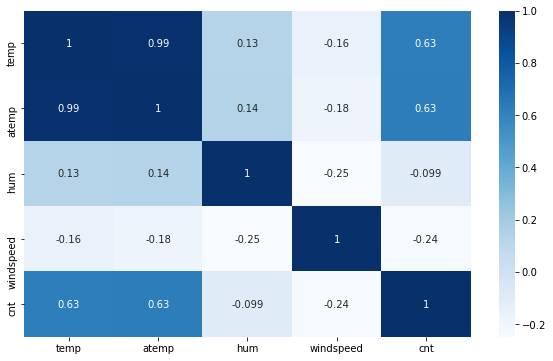

In [20]:
# Checking correlation between continuous numeric variables
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 6))
sns.heatmap(BikeSharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap="Blues", annot = True)
plt.show()

* **`Here we can see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only`**

In [21]:
# Here we are dropping 'atemp' column..
BikeSharing.drop('atemp',axis = 1, inplace = True)

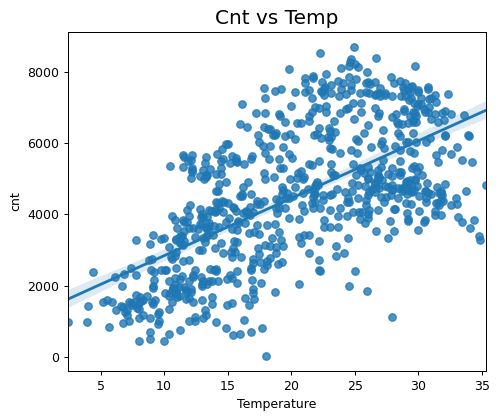

In [22]:
plt.figure(figsize=(6,5), dpi = 90)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=BikeSharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

**`Inference-`**

          * Demand for bikes is positively correlated to temp.
          * We can see that cnt is linearly increasing with temp indicating linear relation.


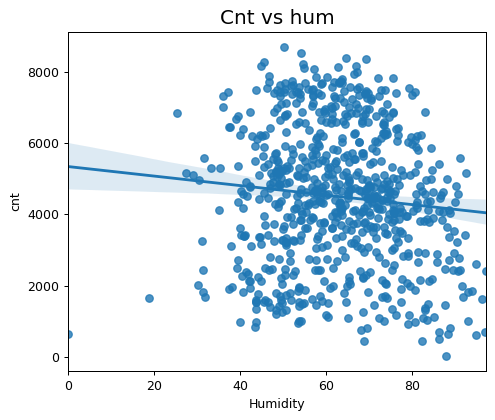

In [23]:
plt.figure(figsize=(6,5), dpi = 90)
plt.title("Cnt vs hum",fontsize=16)
sns.regplot(data=BikeSharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

**`Inference-`**

           * Hum values are more scattered around.
           * Although we can see cnt decreasing with increase in humidity.

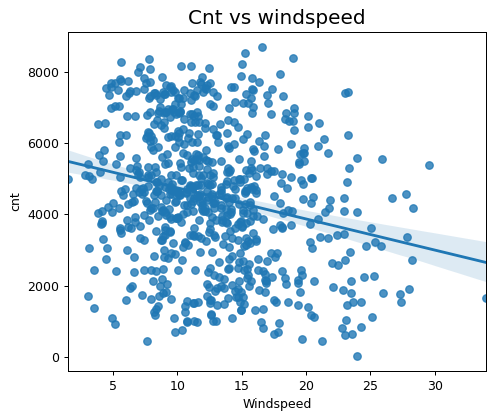

In [24]:
plt.figure(figsize=(6,5), dpi = 90)
plt.title("Cnt vs windspeed",fontsize=16)
sns.regplot(data=BikeSharing,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

**`Inference-`**

         * Windspeed values are more scattered around.
         * Although we can see cnt decreasing with increase in windspeed.

## Step 3- Prepairing the Data For Modeling

In [25]:
# Dropping the dummy variables 
BikeSharing = pd.get_dummies(data=BikeSharing,columns=["season","mnth","weekday"],drop_first=True)
BikeSharing = pd.get_dummies(data=BikeSharing,columns=["weathersit"])

* **`Dropping the first columns as (p-1) dummies can explain p categories.`**
* **`In weathersit first column was not dropped so as to not lose the info about severe weather situation.`**

In [26]:
#Print columns after creating dummies
BikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [27]:
#Print few rows to inspect
BikeSharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### 3.2 - Feature Scaling continuous variables

* To make all features in same scale to interpret easily

Following columns are continous to be scaled temp,hum,windspeed

In [28]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Let us scale continuous variables
num_vars = ['temp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
BikeSharing[num_vars] = scaler.fit_transform(BikeSharing[num_vars])

In [30]:
BikeSharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,0.355170,0.828620,0.284606,0.110792,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0.379232,0.715771,0.466215,0.089623,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0.171000,0.449638,0.465740,0.152669,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0.175530,0.607131,0.284297,0.177174,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0.209120,0.449313,0.339143,0.181546,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### 3.1 - Split Data into training and test

In [31]:
# Checking shape before splitting
BikeSharing.shape

(730, 30)

In [32]:
# y to contain only target variable
y=BikeSharing.pop('cnt')

# X is all remaining variable also our independent variables
X=BikeSharing

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,0.355170,0.828620,0.284606,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0.379232,0.715771,0.466215,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0.171000,0.449638,0.465740,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0.175530,0.607131,0.284297,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0.209120,0.449313,0.339143,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


In [35]:
#Inspect stats for Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.652773,0.341472,0.230920,0.258317,0.250489,0.074364,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.143340,0.152778,0.421834,0.438138,0.433719,0.262619,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.543431,0.232053,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.658526,0.316663,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.755355,0.433334,0.000000,1.000000,0.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.997858,0.823075,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.637961,0.269229,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.729648,0.344872,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.508569,0.583333,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.784062,0.342338,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.816195,0.091026,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### 3.3 - Build a Model using RFE and Automated approach

### **`Use RFE to eliminate some columns`**

In [37]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [39]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 12),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 11),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 5),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

### **`Manual elimination`**
#### Function to build a model using statsmodel api

In [40]:
# Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIFs and print them

In [41]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [42]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [43]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [44]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [45]:
X_train_rfe.shape

(511, 15)

###  3.4 - Build Model
### **`Model 1 - Start with all variables selected by RFE`**

In [46]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.70e-181
Time:                        13:08:24   Log-Likelihood:                 499.97
No. Observations:                 511   AIC:                            -967.9
Df Residuals:                     495   BIC:                            -900.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3207    

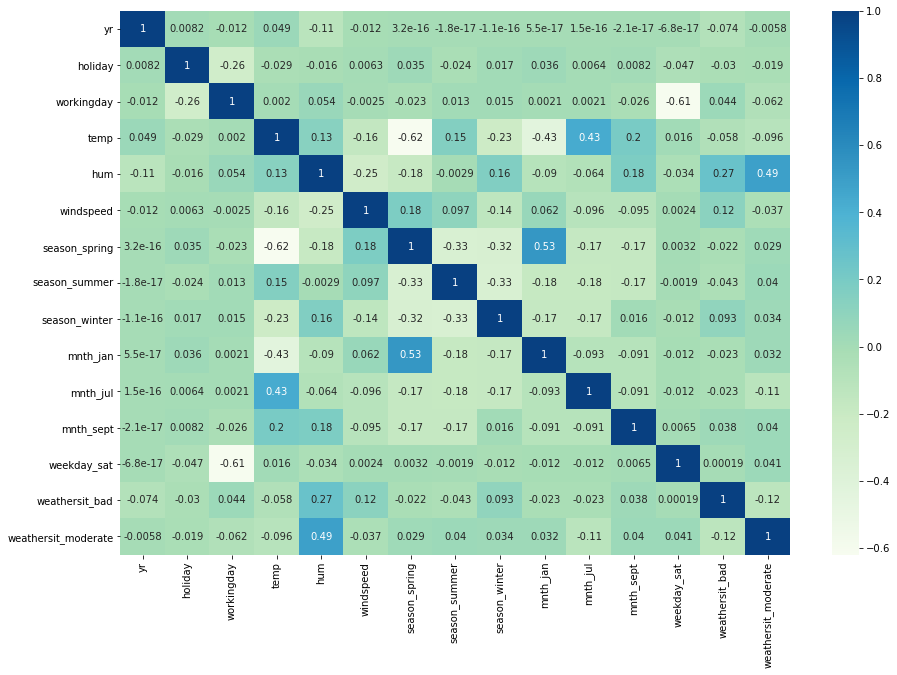

In [47]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(BikeSharing[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

### **`Model 2 -----------------------------------------------------------------------------`**

In [48]:
# Dropping the variable 'mnth_jan' as it has high p-value.
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.35e-182
Time:                        13:08:29   Log-Likelihood:                 499.89
No. Observations:                 511   AIC:                            -969.8
Df Residuals:                     496   BIC:                            -906.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3187    

### **`Model 3 -----------------------------------------------------------------------------`**

In [49]:
# Dropping the variable 'weekday_sat' is insignificant as it has high VIF
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)
     

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.10e-183
Time:                        13:08:29   Log-Likelihood:                 499.75
No. Observations:                 511   AIC:                            -971.5
Df Residuals:                     497   BIC:                            -912.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3143    

### **`Model 4 -----------------------------------------------------------------------------`**

In [50]:
# Dropping the variable 'hum' is insignificant as it has high VIF
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.49e-181
Time:                        13:08:29   Log-Likelihood:                 491.39
No. Observations:                 511   AIC:                            -956.8
Df Residuals:                     498   BIC:                            -901.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2252    

### **`Model 5 -----------------------------------------------------------------------------`**

In [51]:
# Dropping the variable 'temp' is insignificant as it has high VIF
cols = ['yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.19e-148
Time:                        13:08:29   Log-Likelihood:                 410.17
No. Observations:                 511   AIC:                            -796.3
Df Residuals:                     499   BIC:                            -745.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5979    

### **`Model 6 -----------------------------------------------------------------------------`**

In [52]:
# Dropping the variable 'mnth_jul' is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.52e-149
Time:                        13:08:29   Log-Likelihood:                 410.14
No. Observations:                 511   AIC:                            -798.3
Df Residuals:                     500   BIC:                            -751.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6002    

### **`Model 7 -----------------------------------------------------------------------------`**

In [53]:
# Dropping the variable 'season_summer' is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          9.56e-150
Time:                        13:08:29   Log-Likelihood:                 408.45
No. Observations:                 511   AIC:                            -796.9
Df Residuals:                     501   BIC:                            -754.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5895    

### **`Model 8 -----------------------------------------------------------------------------`**

In [54]:
## Trying to replace July with spring as both were highly correlated
cols = ['yr', 'holiday', 'workingday', 'windspeed', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     57.07
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.51e-71
Time:                        13:08:29   Log-Likelihood:                 222.48
No. Observations:                 511   AIC:                            -425.0
Df Residuals:                     501   BIC:                            -382.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4896    

### **`Model 9 -----------------------------------------------------------------------------`**

In [55]:
# Removing windspeed with spring as windspeed was highly correlated with temp

cols = ['yr', 'holiday', 'workingday', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.01e-144
Time:                        13:08:30   Log-Likelihood:                 396.59
No. Observations:                 511   AIC:                            -773.2
Df Residuals:                     501   BIC:                            -730.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5254    

### **`Model 10 -----------------------------------------------------------------------------`**

In [56]:
# Adding 'temp' and removing 'workingday'
cols = ['yr', 'holiday', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.30e-179
Time:                        13:08:30   Log-Likelihood:                 477.23
No. Observations:                 511   AIC:                            -934.5
Df Residuals:                     501   BIC:                            -892.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2031    

**`_Inference_`**

* Here VIF seems to be almost accepted. (VIF < 5)
* p-value for all the features is less than 0.05 
* R2 is 0.818 
* Let us select Model 10 as our final model as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
* Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

## Step - 4 Training The Model

In [57]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [58]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'holiday', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.2031379164732618 [ 0.23063856 -0.07660749  0.4557545  -0.13275544 -0.05792403  0.05796312
  0.05449096 -0.26365317 -0.07674852]


## Step 5: Residual Analysis of the train data

* So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
y_train_pred = lr.predict(X_train[cols])

Text(0.5, 0, 'Errors')

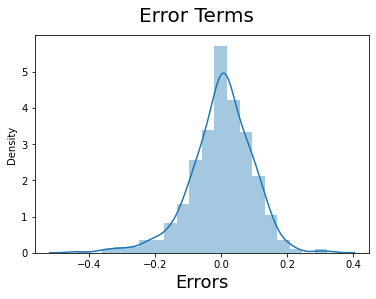

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

* **`Errors are normally distribured here with mean 0. So everything seems to be fine`**

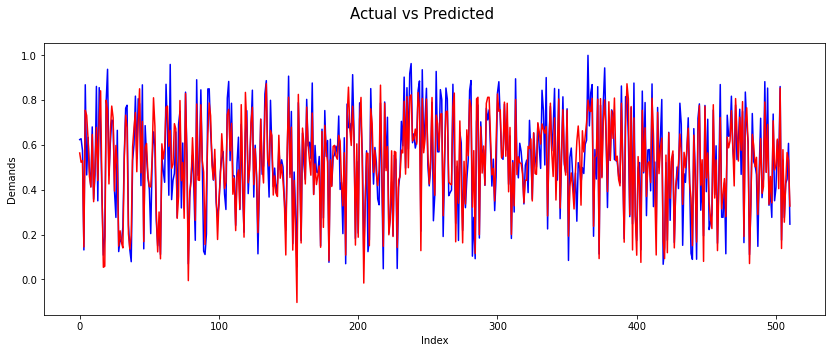

In [61]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

**`Actual and Predicted result following almost the same pattern so this model seems ok.`**

In [62]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8178128479919494

**`Inference`**
* R2 Same as we obtained for our final model

## Step - 6 Predictions and evaluation on the test set.

###  **`6.1-  Predict values for test data set`**

In [63]:
#Columns from our final model
cols = ['yr', 'holiday', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### **`6.2 -  R-Squared value for test predictions`**

In [64]:
# Find out the R squared value between test and predicted test data sets.  
r2 = r2_score(y_test,y_test_pred)
r2

0.8170011008770619

In [65]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),3)
adjusted_r2

0.789

###  **`6.3 -  Homoscedacity`**

**`Inference`**
* R2 value for predictions on test data (0.817) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

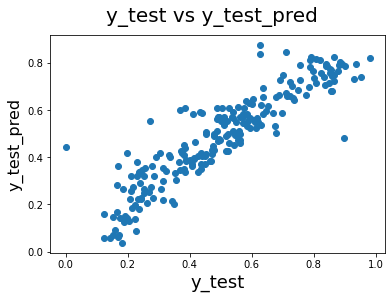

In [66]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

**`Inference`**
* We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

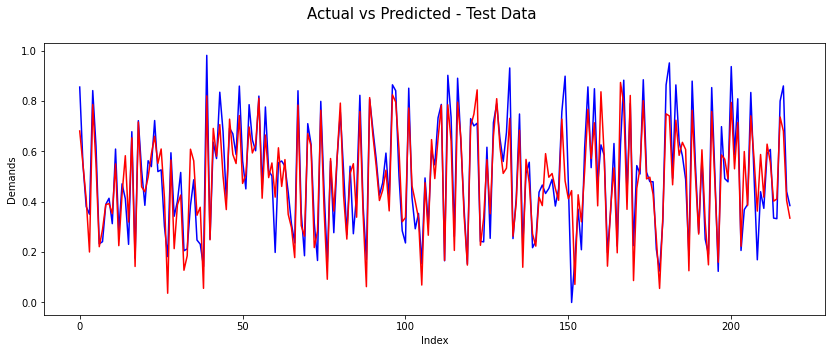

In [67]:
# Actual vs Predicted
c = [i for i in range(0,len(y_test),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted - Test Data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

**`Inference`**
* As we can see predictions for test data is very close to actuals

In [68]:
# Checking data before scaling
BikeSharing.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,0.355170,0.828620,0.284606,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0.379232,0.715771,0.466215,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0.171000,0.449638,0.465740,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0.175530,0.607131,0.284297,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0.209120,0.449313,0.339143,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 7 - Intrepretting the Model
* Let us go with interpretting the RFE with Manual model results as we give more importance to imputation


In [69]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'holiday', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.30e-179
Time:                        13:08:32   Log-Likelihood:                 477.23
No. Observations:                 511   AIC:                            -934.5
Df Residuals:                     501   BIC:                            -892.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2031    

## **`Insights on Final model`**



**`Train dataset`**
* R-Squared value of Train Dataset is **`0.818`**
* Adjusted R-Squared value of Train Dataset is **`0.815`**

**`Test dataset`**
* R-Squared value of Test Dataset is **`0.817`**
* Adjusted R-Squared value of Test Dataset is **`0.789`**

**`The equation of best fitted surface based on final model :`**
* cnt = 0.2031 + yr(0.2306) - holiday(0.0766) + temp(0.4558) - season_spring(0.1328) - mnth_jul(0.0579) + season_winter(0.0581)   + mnth_sept(0.0545) - weathersit_bad(0.2637) - weathersit_moderate(0.0767)

### **`Final model Columns`**
'yr', 'holiday', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate'

In [70]:
# => 0.2031379164732618 
# => [ 0.23063856 -0.07660749  0.4557545  -0.13275544 -0.05792403  0.05796312
#      0.05449096 -0.26365317 -0.07674852]

## Interepretation of results

* 1) yr - a unit increase in yr variable, increases the bike hire numbers by 0.2306 units.
* 2) holiday - no. of bike hire decreases on holiday
* 3) temp - a unit increase in temp variable, increases the bike hire numbers by 0.4558 units.
* 4) season_spring - bike rental is decreased in Spring by 0.1328 units.
* 5) season_winter - bike rental is increased in winter by 0.0581 units.
* 6) month_jul - bike rental is decreased in month of july by 0.0579 units.
* 7) mnth_sep - bike rental is increased in month of september 0.0545 units.
* 8) weathersit_bad - bike rental is decreased when weather conditions are Mist + Cloudy, Mist + Broken clouds, Mist + Few      clouds, Mist weather
* 9) weathersit_moderate - bike rental is decreased when weather conditions are Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

### **`Analysing the above model, the comapany should focus on the following features:`**
* Company should focus on expanding business during Spring.
* Company should focus on expanding business during September and January.
* Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
* There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
### **`Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.`**

## **`Conclusion`**
Significant variables to predict the demand for shared bikes

* temp
* Year (2019)
* holiday
* Season 
* months(January, July, September)
* weathersit( Light, Snow, Mist + Cloudy)